<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

In this lab, we delve into the fundamental concept of feature selection. We start by conducting correlation analysis to identify relevant features for our regression model. By examining the relationship between each feature and the target variable, we aim to pick the most influential features. Additionally, we explore the significance of cross validation in model evaluation and how it relates to feature selection. Through cross validation, we ensure that our model generalises well to unseen data by assessing its performance across multiple validation sets.

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [3]:
# Read CSV
wine_csv = 'winequality_merged.csv'
wine = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [7]:
# ANSWER
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [13]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

### 2. Set Target Variable

Create a target variable for wine quality.

In [17]:
# Explore the Correlation of variable
wine_cor = wine.corr()
print(wine_cor)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
red_wine                   0.486740          0.653036    -0.187397   

                   

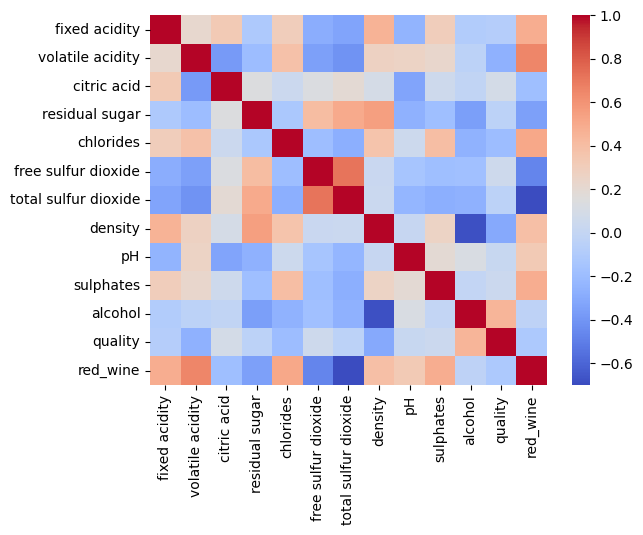

In [19]:
# Heatmap for correlation.
sns.heatmap(wine_cor, annot = False, cmap = "coolwarm")
plt.show()

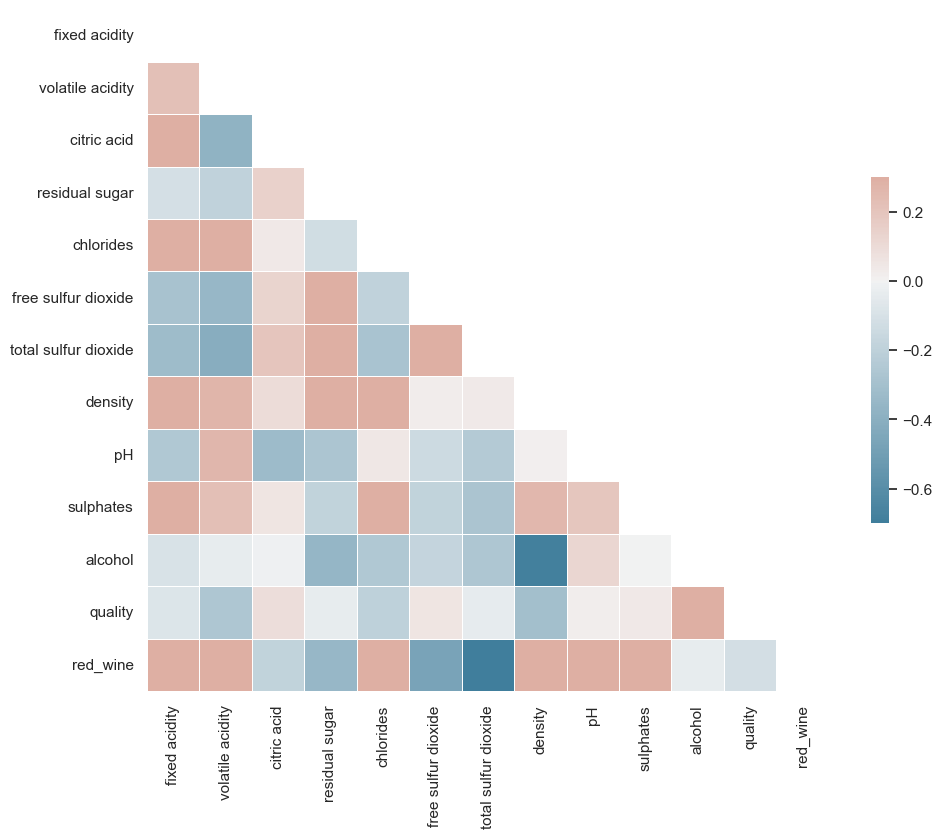

In [21]:
# Another example for heatmap for correlation
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [23]:
# Target Variable
y = wine['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [27]:
# ANSWER
wine.corr()['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
red_wine               -0.119323
Name: quality, dtype: float64

In [29]:
predictor_variable = wine['alcohol']
X = predictor_variable.values.reshape(-1,1)

### 4. Using Linear Regression Create a Model and Test Score

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# Train-Test Split. 20% of data as testset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
X_train.shape

(5197, 1)

In [45]:
# Create a model for Linear Regression
lr = LinearRegression()
# Fit the model with the Training data
lr.fit(X_train, y_train)
# Calculate the score (R^2 for Regression) for Training Data
R2_train = lr.score(X_train, y_train)
print("R2 for Training data:" , R2_train)
# Calculate the score (R^2 for Regression) for Testing Data
R2_test = lr.score(X_test, y_test)
print("R2 for Testing data:" , R2_train)

R2 for Training data: 0.201095495779963
R2 for Testing data: 0.201095495779963


## BONUS: Cross validation

In [61]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [65]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):

    # Get training and test sets for X and y
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    # Fit model with training set
    lr.fit(X_train, y_train)
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    # Score R2 and RMSE on training and test sets and store in list
    # R2 Scores 
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    # RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({
    'training R2' : train_scores,
    'test R2' : test_scores,
    'training RMSE' : train_rmse,
    'testing RMSE' : test_rmse},
    index = [i+1 for i in range (5)]
)
metrics_df

,training R2,test R2,training RMSE,testing RMSE
1,0.204866,0.162937,0.781284,0.786612
2,0.192084,0.215270,0.778675,0.796792
3,0.195729,0.196331,0.781846,0.784389
4,0.194754,0.206884,0.789498,0.752691
5,0.199516,0.188246,0.779664,0.792693


In [67]:
# Describe the metrics
metrics_df.describe()

,training R2,test R2,training RMSE,testing RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.197390,0.193934,0.782193,0.782635
std,0.004957,0.020136,0.004274,0.017444
min,0.192084,0.162937,0.778675,0.752691
25%,0.194754,0.188246,0.779664,0.784389
50%,0.195729,0.196331,0.781284,0.786612
75%,0.199516,0.206884,0.781846,0.792693
max,0.204866,0.215270,0.789498,0.796792


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data?

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



